<a href="https://colab.research.google.com/github/deviandinifebrianti/PCVK_Genap_2023/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama    : Devi Andini Febrianti
# NIM/No  : 2141720189/09
# **Morfologi (Erosi, Dilasi, Opening, Closing, Transformasi Top-hat dan Bottom-hat, Skeleton, Thickening)**

# 1. Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut

In [ ]:
from google.colab import drive

#Akses google drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import filters, io, img_as_float, color, morphology
from skimage.morphology import skeletonize

# 3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:

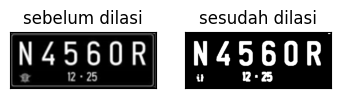

In [ ]:
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  img= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED= np.ones((w,w), dtype=np.uint8)
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      img[i,j]= np.max(product)
  return img

img_d= cv2.imread('/content/drive/MyDrive/PCVK/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w=5
img = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('sebelum dilasi'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img,cmap = 'gray')
plt.title('sesudah dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

# 4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:

[[1 1 1]
 [1 1 1]
 [1 1 1]]


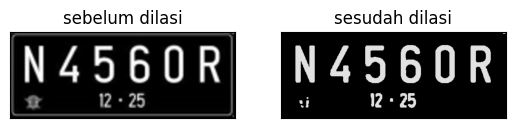

In [ ]:
img2 = cv2.imread('/content/drive/MyDrive/PCVK/plat nomer.jpg')
#img = cv2.imread('morp.jpg',0)
ret, thresh = cv2.threshold(img2, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)
print(kernel)
plt.subplot(121),plt.imshow(img2),plt.title('sebelum dilasi')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi),plt.title('sesudah dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

# 5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:


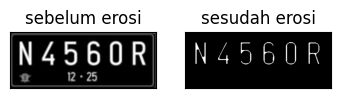

In [ ]:
#Erosi Tanpa Library
def erosi_citra(F,k):
  #size image
  m,n= F.shape
  #Generate structure element erosi (SE)
  SE= np.ones((k,k), dtype=np.uint8)
  constant= (k-1)//2
  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE

img_e= cv2.imread('/content/drive/MyDrive/PCVK/plat nomer.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 175, 225, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('sebelum erosi'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('sesudah erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

# 6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:

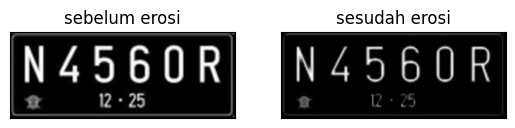

In [ ]:
img6= cv2.imread('/content/drive/MyDrive/PCVK/plat nomer.jpg')

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img6,kernel,iterations = 1)

plt.subplot(121),plt.imshow(img6),plt.title('sebelum erosi')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('sesudah erosi')
plt.xticks([]), plt.yticks([])
plt.show()

# 7. Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:
# **Operasi Opening Menggunakan tanpa Library Morphology**


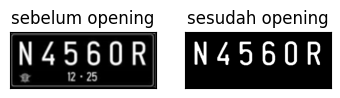

In [ ]:
img7= cv2.imread('/content/drive/MyDrive/PCVK/plat nomer.jpg',0)

reto, thresho = cv2.threshold(img7, 127, 225, cv2.THRESH_BINARY)
k=7
img_7 = dilasi_citra(erosi_citra(thresho,k),k)

plt.subplot(131),plt.imshow(img7,cmap = 'gray')
plt.title('sebelum opening'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(img_7,cmap = 'gray')
plt.title('sesudah opening'), plt.xticks([]), plt.yticks([])
plt.show()

# **Operasi Opening Menggunakan Library Morphology**

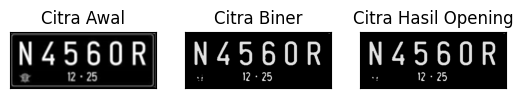

In [ ]:
img= cv2.imread('/content/drive/MyDrive/PCVK/plat nomer.jpg')
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
open = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)
plt.subplot(131),plt.imshow(img,cmap = 'gray')

plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')

plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()


# 8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:
# **Operasi closing tanpa library morphology**

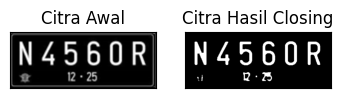

In [ ]:
img8= cv2.imread('/content/drive/MyDrive/PCVK/plat nomer.jpg', 0)

# Thresholding
retc, threshc = cv2.threshold(img8, 127, 225,cv2.THRESH_BINARY)

# Erosi dan Dilasi
kernel =7
imgC = erosi_citra(dilasi_citra(threshc,kernel),kernel)

# Menampilkan citra
plt.subplot(131),plt.imshow(img8,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgC,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]),
plt.yticks([])
plt.show()

# **Operasi closing dengan library morphology**

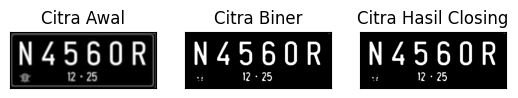

In [ ]:
img_8= cv2.imread('/content/drive/MyDrive/PCVK/plat nomer.jpg', 0)
ret, thresh = cv2.threshold(img_8, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel)

plt.subplot(131),plt.imshow(img_8,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closs,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

# 9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
# **Cross 3**

SED = Cross 3


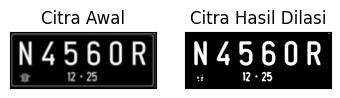

In [ ]:
#Dilasi Cross SED
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  img= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype = np.uint8)
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      img[i,j]= np.max(product)
  return img

print('SED = Cross 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=3
img = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

# **Cross 5**

SED = Cross 5


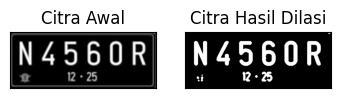

In [ ]:
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  img= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [1, 1, 1, 1, 1],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0]], dtype = np.uint8)
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      img[i,j]= np.max(product)
  return img
print('SED = Cross 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=5
img = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

# 10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

SED = Circular 3


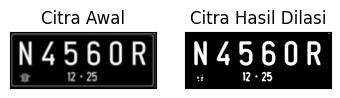

SED = Circular 5


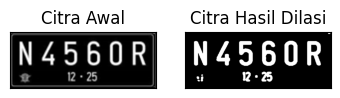

In [ ]:
#Dilasi Circular SED
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  img= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      img[i,j]= np.max(product)
  return img

print('SED = Circular 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=3
img = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

print('SED = Circular 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/plat nomer.jpg',0)

ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
img = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()


# 11.  Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:


SE = Rectangle 3x5


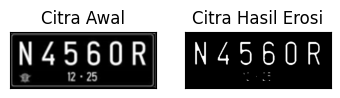

SE = Rectangle 5x7


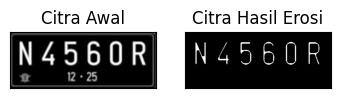

In [ ]:
#Erosi Cross SE
def erosi_citra(F,p,l):
  #size image
  m,n= F.shape
  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l)) #SE persegi panjang
  constant1= (l-1)//2
  constant2= (p-1)//2
  # print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE

print('SE = Rectangle 3x5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/plat nomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = erosi_citra(thresh1,p,l)
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Rectangle 5x7')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/plat nomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1,p,l)
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

# 12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

SE = Line Vertikal 3


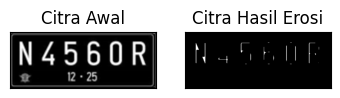

SE = Line Vertikal 5


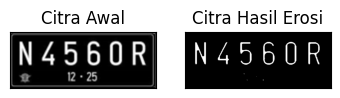

In [ ]:
#Erosi Line Vertikal SE
def erosi_citra(F,k):
  #size image
  m,n= F.shape
  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k)) #SE line vertikal
  constant= (k-1)//2
  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE

print('SE = Line Vertikal 3')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/plat nomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k=9
imgE = erosi_citra(thresh1,k)
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

print('SE = Line Vertikal 5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/plat nomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225,
cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

# 13. TopHat

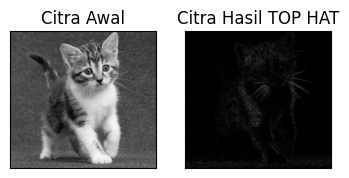

In [ ]:
# Getting the kernel to be used in Top-Hat
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Applying the Top-Hat operation
tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

# 14. BLACKCHAT

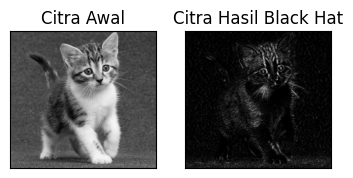

In [ ]:
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Applying the Black-Hat operation
#tophat_img = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)
#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

# 15. Skeleton

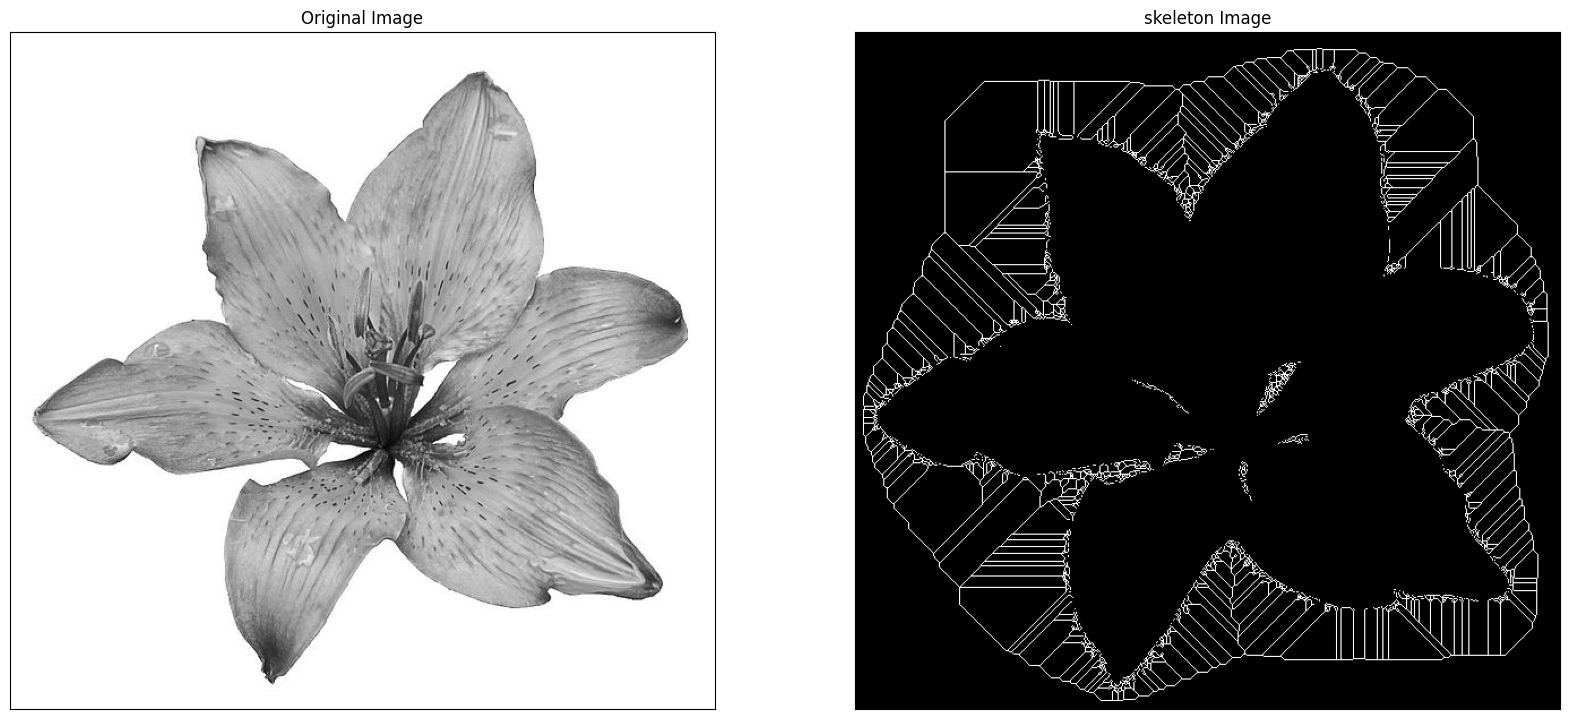

In [ ]:
# read image
img = cv2.imread('/content/drive/MyDrive/PCVK/lily.jpg',0)

binary = img > filters.threshold_triangle(img)

# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# skeletonize image
skeleton = skeletonize(binary_cp)

# print images
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])

plt.savefig("binary and bin_skeleton.png")
plt.show()

# 16. Skeleton Inverse

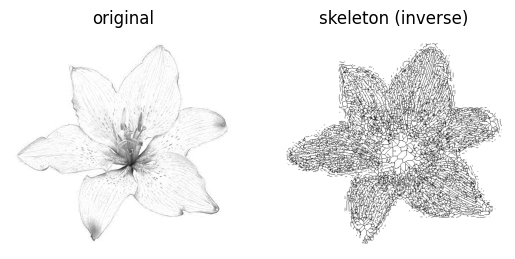

In [ ]:
# read image
img = io.imread('/content/drive/MyDrive/PCVK/lily.jpg')[..., 0]
# Note: we want the black bits to be True, so use <
binary = img < filters.threshold_triangle(img)
# skeletonize image
skeleton = skeletonize(binary)
# print images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()
# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()
plt.show()

# 17. Thickening

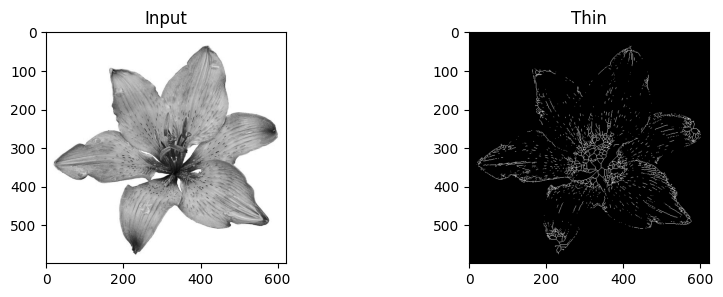

In [ ]:
image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK/lily.jpg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')

plt.savefig('/tmp/char_out.png')
plt.show()

# Tugas Praktikum
Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra tersebut.

In [4]:
def convolution2d(image, kernel):
    tinggi = image.shape[0]
    lebar = image.shape[1]

    tinggi_kernel = kernel.shape[0]
    lebar_kernel = kernel.shape[1]

    start = int(lebar_kernel/2)

    image_result = np.copy(image)

    for y in range(start, tinggi - start):
        for x in range(start, lebar - start):
            value = 0

            for ky in range(tinggi_kernel):
                for kx in range(lebar_kernel):
                    i = y - start + ky
                    j = x - start + kx

                    value += image[i, j] * kernel[ky, kx]

            image_result[y, x] = np.clip(value, 0, 255)

    return image_result


kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]], dtype=np.float32)

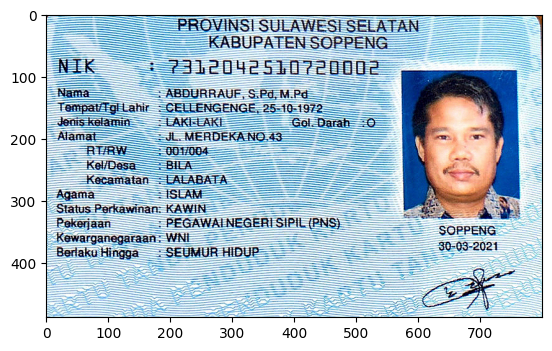

In [5]:
img_ktp = cv2.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')
img_ktp = cv2.cvtColor(img_ktp, cv2.COLOR_BGR2RGB)
ktp_copy = np.copy(img_ktp)
ktp_filtered = convolution2d(ktp_copy, kernel_sharpen)

plt.imshow(ktp_filtered)

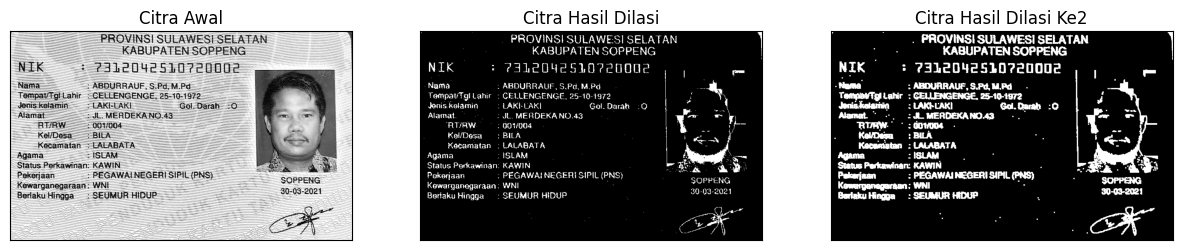

In [6]:
input = cv2.cvtColor(ktp_filtered, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(input, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((2,1),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)

Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 17))
blackhat = cv2.morphologyEx(dilasi, cv2.MORPH_BLACKHAT, Kernel)

kernel = np.ones((3,3),np.uint16)
dilasi2 = cv2.dilate(blackhat,kernel,iterations = 1)

plt.figure(figsize=(15,13))
plt.subplot(131),plt.imshow(input, cmap='gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blackhat, cmap='gray'),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(dilasi2, cmap='gray'),plt.title('Citra Hasil Dilasi Ke2')
plt.xticks([]), plt.yticks([])

plt.show()